In [1]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [2]:
# увеличим дефолтный размер графиков
from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 5]

In [3]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_excel("Analysis of purchases.xlsx")

In [5]:
df.shape

(41, 15)

In [6]:
df.head()

,№,Дата размещения объявления о закупке,Ссылка на карточку закупки,Наименование заказчика,Адрес заказчика,Посредник (если есть),Предмет закупки,Дата проведения закупки,Форма проведения закупки,Начальная (максимальная) цена контракта (руб),Место проведения (ЭТП),Цена контракта (т.е. предложение Победителя),Ценовое предложение Участника 2,Участник 1 (Победитель),Участник 2
0,1,2021-11-03,№ 0332100002621000044,УПР. СУД. ДЕПАРТ. В НИЖ.ОБЛ.,"Российская Федерация, 603000, Нижегородская об...",NaN,Бумага для копировально-множительных аппаратов...,2021-11-12,Электронный аукцион,18377170.00,ЭТП Газпромбанк,18377170.00,NaN,Гравшин Д. П.,NaN
1,2,2021-10-15,№ 0332100020521000020,ДЕП. ЛЕСН.ХОЗ-ВА ПО ПРИВОЛЖСК. ФЕД. ОКР.,"Российская Федерация, 603024, Нижегородская об...",NaN,Канцелярские товары,2021-11-01,Электронный аукцион,93977.13,АО «Сбербанк-АСТ»,43929.92,44474.88,"ООО ""САМСОН НН""","ООО ""АВАНТЕ"""
2,3,2021-10-13,№ 0232100000121000060,ТЕРР. ФОНД ОМС НИЖ. ОБЛ.,"Российская Федерация, 603006, Нижегородская об...",NaN,Канцелярские товары,2021-10-29,Электронный аукцион,85159.07,НЭП,47263.07,47688.87,"ООО ""СМАРТОФИС""","ООО ""АВАНТЕ"""
3,4,2021-10-12,№ 0332100014921000024,"ВОЛЖСК.ОКСК. УПР. ВЕД. СЛУЖ. ПО ЭКОЛ., ТЕХНОЛО...","Российская Федерация, 603950, Нижегородская об...",NaN,Канцелярские товары,2021-10-25,Электронный аукцион,17994.47,АО «Сбербанк-АСТ»,9074.49,9164.46,"ООО ""ФАРМАТ""","ООО ""АВАНТЕ"""
4,5,2021-10-11,№ 0332100022721000753,"ФГБОУ ВЫСШ. ОБР. ""ПИМУ"" МИН. ЗДРАВООХР. РФ","Российская Федерация, 603005, Нижегородская об...",NaN,Канцелярские товары,2021-10-19,Электронный аукцион,131320.00,АО «Сбербанк-АСТ»,89520.00,90300.00,"ООО ""КОМПАНИЯ КАНЦЛАЙН""","ООО ""АВАНТЕ"""


In [7]:
df['Посредник (если есть)'] = df['Посредник (если есть)'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   №                                              41 non-null     int64         
 1   Дата размещения объявления о закупке           41 non-null     datetime64[ns]
 2   Ссылка на карточку закупки                     41 non-null     object        
 3   Наименование заказчика                         41 non-null     object        
 4   Адрес заказчика                                41 non-null     object        
 5   Посредник (если есть)                          0 non-null      float64       
 6   Предмет закупки                                41 non-null     object        
 7   Дата проведения закупки                        41 non-null     datetime64[ns]
 8   Форма проведения закупки                       41 non-null    

Всего мы рассматриваем 41 закупку, причем в 40 из них контракт был заключен, однако есть одна закупка, по которой аукцион не состоялся (№ 0332100043421000061), в связи с чем по этой закупке нет информации о цене контракта и об участниках. 

In [9]:
#сколько всего было заказчиков
print('Количество уникальных заказчиков: ', df['Наименование заказчика'].nunique())

Количество уникальных заказчиков:  22


In [10]:
#сколько заявок поступало от каждого заказчика
df['Наименование заказчика'].value_counts()

АДМ. ВОЗНЕС. МУНИЦ. Р-НА НИЖ. ОБЛ.                                            4
МЕЖМУНИЦ. ОТД. МВД РФ "УРЕНСКИЙ"                                              4
ТЕРР. ФОНД ОМС НИЖ. ОБЛ.                                                      3
АРБИТР. СУД НИЖ. ОБЛ.                                                         3
МЕЖМУНИЦ. ОТД. МВД ПФ "ПАВЛОВСКИЙ"                                            3
ФГБОУ ВЫСШ. ОБР. "ПИМУ" МИН. ЗДРАВООХР. РФ                                    3
МЕЖРЕГ. ФИЛ. ФЕД. КАЗ. УЧР. "ЦЕНТР ПО ОБЕСП. ДЕЯТ. КАЗНАЧ. РОССИИ" В Г. НН    3
НИЖ. ИНСТ. УПРАВЛ. ФИЛ. ФГБОУ ВЫСШ. ОБР. "РАНХИГС ПРИ ПРЕЗ. РФ."              2
ДЕП. ЛЕСН.ХОЗ-ВА ПО ПРИВОЛЖСК. ФЕД. ОКР.                                      2
АДМ. СЕРГАЧСКОГО МУНИЦ.Р-НА НИЖ.ОБЛ.                                          2
УФНС ПО НИЖ. ОБЛ.                                                             1
УПР. СУД. ДЕПАРТ. В НИЖ.ОБЛ.                                                  1
УПР. ФИН. АДМ. ЛЫСК. МУН. ОКР. НИЖ. ОБЛ.

In [11]:
print('В течение рассматриваемого периода по рынку канцтоваров было заключено контрактов на ', 
     df['Цена контракта (т.е. предложение Победителя)'].sum(), 'руб.')

В течение рассматриваемого периода по рынку канцтоваров было заключено контрактов на  22506537.78 руб.


In [12]:
print('Средняя стоимость контракта: ', 
      round(df['Цена контракта (т.е. предложение Победителя)'].mean(), 2), 
      'руб.')

Средняя стоимость контракта:  562663.44 руб.


In [13]:
print('Медиана стоимости контракта: ', 
      round(df['Цена контракта (т.е. предложение Победителя)'].median(), 2), 
      'руб.')

Медиана стоимости контракта:  35283.26 руб.


In [14]:
#мера рассеяния, описывающая сравнительное отклонение между значениями данных и средней величиной
print('Стандартное отклонение стоимости контракта: ', 
      round(df['Цена контракта (т.е. предложение Победителя)'].std(), 2), 
      'руб.')

Стандартное отклонение стоимости контракта:  2899100.33 руб.


In [16]:
#вывод уникальных значений категориальных переменных
cols = df.select_dtypes(include=['object']).columns
for i in cols:
    print(i,'(уник. знач.:', df[i].nunique(), ') :', df[i].unique(), '\n')
    

Ссылка на карточку закупки (уник. знач.: 41 ) : ['№ 0332100002621000044' '№ 0332100020521000020' '№ 0232100000121000060'
 '№ 0332100014921000024' '№ 0332100022721000753' '№ 0132100000721000022'
 '№ 0332100014621000043' '№ 0332300185021000043' '№ 0332100002321000051'
 '№ 0332100002321000050' '№ 0132100004321000029' '№ 0332100002321000054'
 '№ 0132100004321000027' '№ 0132100004321000030' '№ 0332300214721000079'
 '№ 0332300214721000077' '№ 0332300214721000078' '№ 0832100004621000044'
 '№ 0832100004621000043' '№ 0832100004621000041' '№ 0232100000121000058'
 '№ 0332300021921000017' '№ 0332300021921000016' '№ 0132100000121000019'
 '№ 0332300214721000076' '№ 0332100054821000019' '№ 0332100021321000331'
 '№ 0332100054821000017' '№ 0232100000121000049' '№ 0332100020521000017'
 '№ 0332100047121000024' '№ 0332100043421000061' '№ 0332100019821000008'
 '№ 0332100022721000615' '№ 0332100022721000614' '№ 0132100003021000010'
 '№ 0132600007721000071' '№ 0132100003921000029' '№ 0132100003921000028'
 '№

In [17]:
df.describe()

,№,Посредник (если есть),Начальная (максимальная) цена контракта (руб),Цена контракта (т.е. предложение Победителя),Ценовое предложение Участника 2
count,41.000000,0.0,4.100000e+01,4.000000e+01,3.400000e+01
mean,21.000000,NaN,6.017251e+05,5.626634e+05,9.634473e+04
std,11.979149,NaN,2.870242e+06,2.899100e+06,2.502828e+05
min,1.000000,NaN,4.802970e+03,3.645350e+03,3.675980e+03
25%,11.000000,NaN,2.347900e+04,1.444991e+04,1.414689e+04
50%,21.000000,NaN,5.185487e+04,3.528326e+04,3.459918e+04
75%,31.000000,NaN,1.082349e+05,6.751756e+04,5.305182e+04
max,41.000000,NaN,1.837717e+07,1.837717e+07,1.410274e+06


In [18]:
df.describe(include=['object'])

,Ссылка на карточку закупки,Наименование заказчика,Адрес заказчика,Предмет закупки,Форма проведения закупки,Место проведения (ЭТП),Участник 1 (Победитель),Участник 2
count,41,41,41,41,41,41,40,34
unique,41,22,27,5,1,5,18,13
top,№ 0132100000121000019,АДМ. ВОЗНЕС. МУНИЦ. Р-НА НИЖ. ОБЛ.,"Российская Федерация, 607340, Нижегородская об...",Канцелярские товары,Электронный аукцион,АО «Сбербанк-АСТ»,"ООО ""АВАНТЕ""","ООО ""АВАНТЕ"""
freq,1,4,4,36,41,27,9,7


Заметим, что из 41 закупки был проведет аукцион по 40, причем 18 из 22 уникальных поставщиков удалось выиграть аукцион.

Наиболее популярный местом для проведения закупки является АО "Сбербанк-АСТ": 27 из 41 закупки проводились на этой платформе.

Участник аукциона, который чаще всего получал заказы, - ООО "Аванте": 9 из 41 закупок.

In [19]:
df['Участник 1 (Победитель)'].unique()

array(['Гравшин Д. П.', 'ООО "САМСОН НН"', 'ООО "СМАРТОФИС"',
       'ООО "ФАРМАТ"', 'ООО "КОМПАНИЯ КАНЦЛАЙН"', 'ООО "КАНЦПРАЙС"',
       'Кузнецова Т. В.', 'ООО "КАНЦАЙЛЕНД"', 'ООО "АВАНТЕ"',
       'ООО "КАНЦЕЛЯРСКИЙ МИР"', 'Филиппов Б. Б.', 'ООО "КАНЦТРЕНД"',
       'ООО "ФАВИ-ИНТЕРНЭШНЛ"', 'ООО "КОНСТАНТА"', nan,
       'ООО "ГРУППА КОМПАНИЙ МАГИК"', 'ООО "АЛМИНА"',
       'ООО "НОВОЕ ИЗМЕРЕНИЕ"', 'Забелин А. В.'], dtype=object)

In [20]:
for i in df['Участник 1 (Победитель)'].unique():
    mean_cost = df[df['Участник 1 (Победитель)']==i]['Цена контракта (т.е. предложение Победителя)'].mean()
    print('Средняя стоимость контракта, заключенная с поставщиком ', i, ' = ', round(mean_cost, 2), 'руб.')

Средняя стоимость контракта, заключенная с поставщиком  Гравшин Д. П.  =  18377170.0 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "САМСОН НН"  =  43929.92 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "СМАРТОФИС"  =  87056.65 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "ФАРМАТ"  =  29174.77 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "КОМПАНИЯ КАНЦЛАЙН"  =  89520.0 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "КАНЦПРАЙС"  =  380041.29 руб.
Средняя стоимость контракта, заключенная с поставщиком  Кузнецова Т. В.  =  39358.1 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "КАНЦАЙЛЕНД"  =  30795.16 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "АВАНТЕ"  =  54135.75 руб.
Средняя стоимость контракта, заключенная с поставщиком  ООО "КАНЦЕЛЯРСКИЙ МИР"  =  11911.32 руб.
Средняя стоимость контракта, заключенная с поставщиком  Филиппов Б. Б.  =  22303.02 руб.
Ср

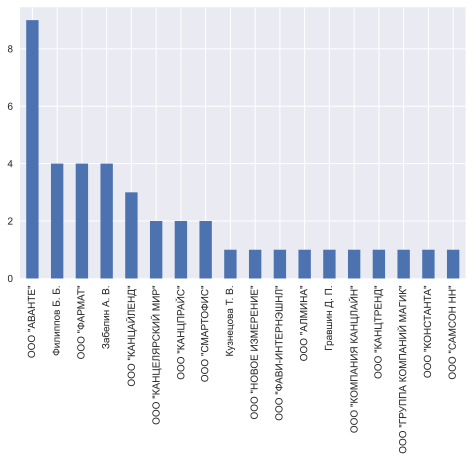

In [21]:
#распределение количества контрактов по поставщикам (абс)
df['Участник 1 (Победитель)'].value_counts().plot(kind='bar', rot=90) 
plt.show()

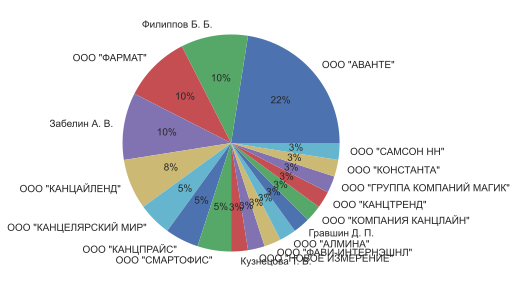

In [22]:
#распределение количества контрактов по поставщикам (отн)
df['Участник 1 (Победитель)'].value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='')
plt.show()

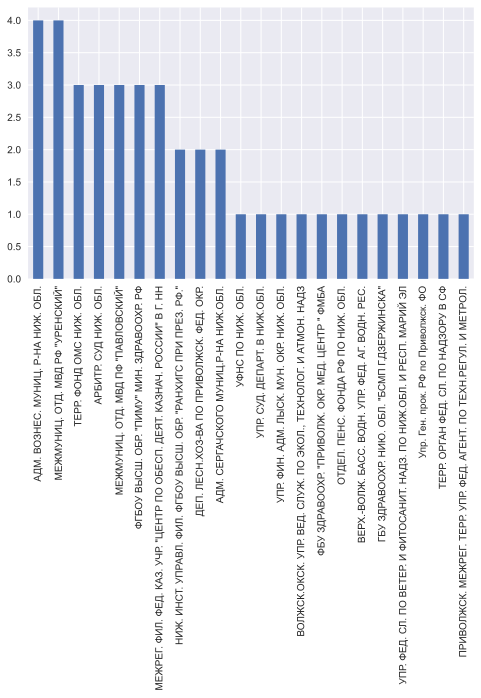

In [23]:
#распределение количества контрактов по заказчикам (абс)
df['Наименование заказчика'].value_counts().plot(kind='bar', rot=90) 
plt.show()

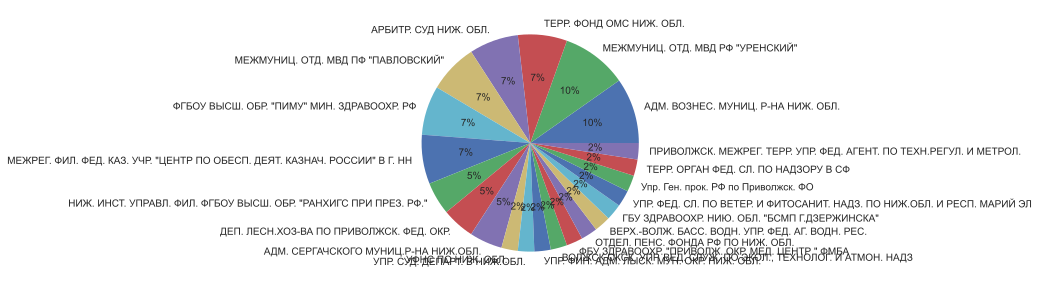

In [24]:
#распределение количества контрактов по заказчикам (отн)
df['Наименование заказчика'].value_counts().plot(kind='pie', autopct='%1.0f%%', ylabel='')
plt.show()

In [ ]:
#Распределение суммы контрактов по поставщикам (абс)

df.groupby('Участник 1 (Победитель)')['Цена контракта (т.е. предложение Победителя)'].agg(['sum']).plot(kind='bar', 
                                                                                                        rot=90,
                                                                                                        legend=False,
                                                                                                       #ylim=(0,2000000)
                                                                                                       )

<AxesSubplot:xlabel='Участник 1 (Победитель)'>

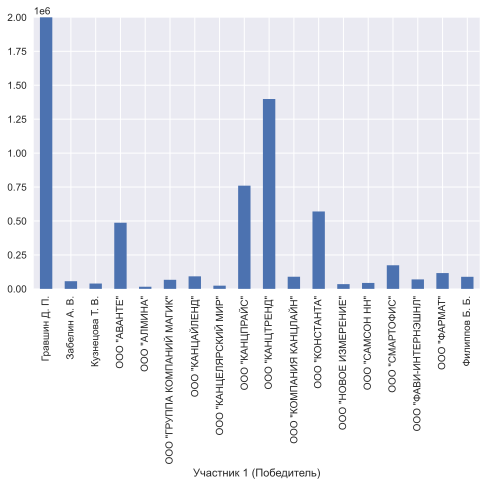

In [50]:
#Распределение суммы контрактов по поставщикам (абс)

df.groupby('Участник 1 (Победитель)')['Цена контракта (т.е. предложение Победителя)'].agg(['sum']).plot(kind='bar', 
                                                                                                        rot=90,
                                                                                                        legend=False,
                                                                                                       ylim=(0,2000000)
                                                                                                       )

In [76]:
x = df.groupby('Участник 1 (Победитель)')['Цена контракта (т.е. предложение Победителя)'].agg(['sum']).sort_values(by='sum',
                                                                                                               ascending=False)
my_list = ['Гравшин Д. П.', 'ООО "КАНЦТРЕНД"', 'ООО "КАНЦПРАЙС"', 'ООО "КОНСТАНТА"', 'ООО "АВАНТЕ"',
          '', '','','','','','','','','','','', '']

array([<AxesSubplot:>], dtype=object)

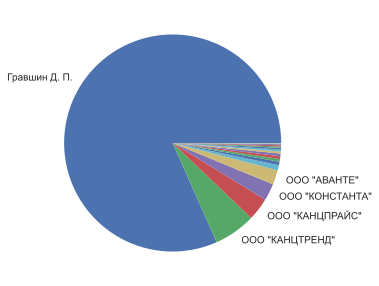

In [78]:
#Распределение суммы контрактов по поставщикам (отн)
labels=my_list
x = pd.DataFrame(df.groupby('Участник 1 (Победитель)')['Цена контракта (т.е. предложение Победителя)'].agg(['sum'])).sort_values(by='sum',
                                                                                                               ascending=False)
x.plot(kind='pie', subplots=True, legend=False, ylabel='', labels=labels)

<AxesSubplot:xlabel='Наименование заказчика'>

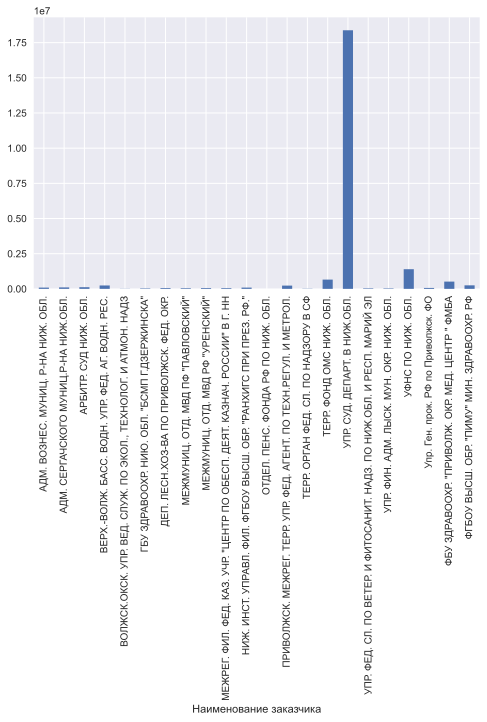

In [52]:
#Распределение суммы контрактов по заказчикам (абс)

df.groupby('Наименование заказчика')['Цена контракта (т.е. предложение Победителя)'].agg(['sum']).plot(kind='bar', 
                                                                                                        rot=90,
                                                                                                        legend=False,
                                                                                                       #ylim=(0,2000000)
                                                                                                       )

<AxesSubplot:xlabel='Наименование заказчика'>

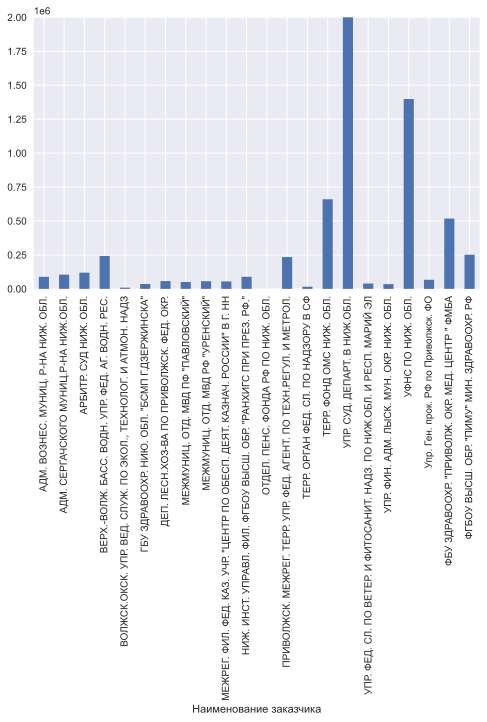

In [53]:
#Распределение суммы контрактов по заказчикам (абс)

df.groupby('Наименование заказчика')['Цена контракта (т.е. предложение Победителя)'].agg(['sum']).plot(kind='bar', 
                                                                                                        rot=90,
                                                                                                        legend=False,
                                                                                                       ylim=(0,2000000)
                                                                                                       )

In [82]:
x = df.groupby('Наименование заказчика')['Цена контракта (т.е. предложение Победителя)'].agg(['sum']).sort_values(by='sum',
                                                                                                               ascending=False)
len(x)

22

In [83]:
my_list = ['УПР. СУД. ДЕПАРТ. В НИЖ.ОБЛ.', 'УФНС ПО НИЖ. ОБЛ.', 'ТЕРР. ФОНД ОМС НИЖ. ОБЛ.', 
           'ФБУ ЗДРАВООХР. "ПРИВОЛЖ. ОКР. МЕД. ЦЕНТР " ФМБА', 'ФГБОУ ВЫСШ. ОБР. "ПИМУ" МИН. ЗДРАВООХР. РФ',
          '', '','','','','','','','','','','', '', '', '', '', '']

array([<AxesSubplot:>], dtype=object)

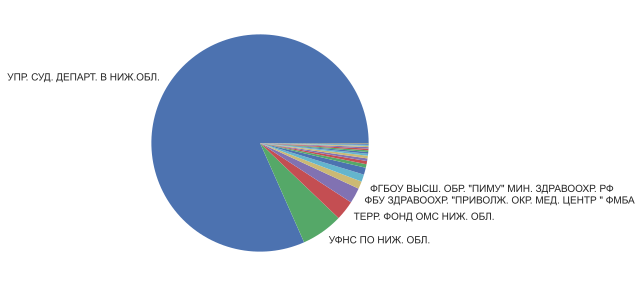

In [84]:
#Распределение суммы контрактов по заказчикам (отн)
labels=my_list
x = pd.DataFrame(df.groupby('Наименование заказчика')['Цена контракта (т.е. предложение Победителя)'].agg(['sum'])).sort_values(by='sum',
                                                                                                               ascending=False)
x.plot(kind='pie', subplots=True, legend=False, ylabel='', labels=labels)